### Score: 88

Q1.[4+9+9]

Q2.[10]

Q3.[4+4+0+5+5+5+5+4+5+4]

Q4.[5+5+5]

In [1]:
#1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#tsv文件使用/t作为分隔符，且文件中已有表头
Sig_Eqs = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\earthquakes-2024-10-23_13-55-19_+0800.tsv', sep='\t',header=0)
Sig_Eqs.columns

Index(['Search Parameters', 'Id', 'Year', 'Mo', 'Dy', 'Hr', 'Mn', 'Sec', 'Tsu',
       'Vol', 'Country', 'Area', 'Region', 'Location Name', 'Latitude',
       'Longitude', 'Focal Depth (km)', 'Mag', 'Mw', 'Ms', 'Mb', 'Ml', 'Mfa',
       'Unk', 'MMI Int', 'Deaths', 'Death Description', 'Missing',
       'Missing Description', 'Injuries', 'Injuries Description',
       'Damage ($Mil)', 'Damage Description', 'Houses Destroyed',
       'Houses Destroyed Description', 'Houses Damaged',
       'Houses Damaged Description', 'Total Deaths', 'Total Death Description',
       'Total Missing', 'Total Missing Description', 'Total Injuries',
       'Total Injuries Description', 'Total Damage ($Mil)',
       'Total Damage Description', 'Total Houses Destroyed',
       'Total Houses Destroyed Description', 'Total Houses Damaged',
       'Total Houses Damaged Description'],
      dtype='object')

In [33]:
#1.1
# 按‘Country’分类并把‘Deaths’总和
# NOTE: 应该读取Total Deaths列 -1
total_deaths_country = Sig_Eqs.groupby('Country')['Deaths'].sum()

# 得到total deaths排名前20的国家
top_20_countries = total_deaths_country.nlargest(20)
top_20_countries

Country
CHINA           2075947.0
TURKEY          1188881.0
IRAN            1011453.0
ITALY            498418.0
SYRIA            439224.0
HAITI            323478.0
AZERBAIJAN       317219.0
JAPAN            279607.0
ARMENIA          191890.0
PAKISTAN         145083.0
IRAQ             136200.0
ECUADOR          135496.0
TURKMENISTAN     117412.0
PERU             102169.0
ISRAEL            90388.0
PORTUGAL          83572.0
GREECE            80378.0
CHILE             64277.0
INDIA             63507.0
TAIWAN            57153.0
Name: Deaths, dtype: float64

Year
-2150.0    0.0
-2000.0    7.1
-1610.0    0.0
-1566.0    0.0
-1450.0    0.0
          ... 
 2020.0    0.0
 2021.0    0.0
 2022.0    0.0
 2023.0    0.0
 2024.0    0.0
Name: Ms, Length: 961, dtype: float64


<Axes: xlabel='Year'>

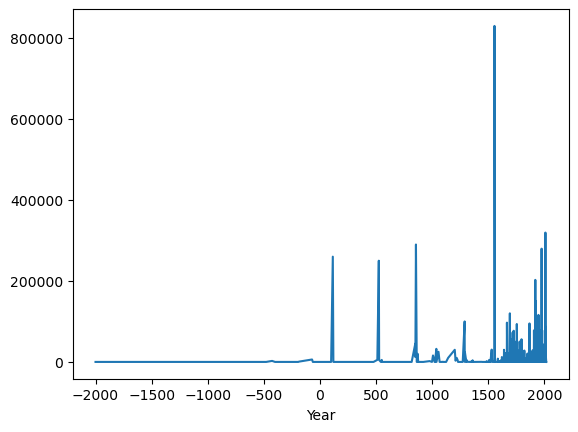

In [4]:
#1.2
#按‘Year’分类得到死亡总和
total_deaths_Year = Sig_Eqs.groupby('Year').sum()

#选择‘Ms’>3.0的部分画图
# NOTE: 这样得到的Ms列是在年分辨率上求和后的 -1
total_deaths_Year.loc[(total_deaths_Year['Ms']>3.0)]['Deaths'].plot()

#随着时间推移，每年Ms>3.0导致的死亡越来越多。
#原因：随着时间推移，人口密度越来越大，每次大地震所影响到的人员越来越多，因此地震导致的死亡增加

In [18]:
#1.3
def CountEq_LargestEq(country):
    #选择对应的数据
    Country_data = Sig_Eqs[Sig_Eqs['Country'] == country]

    #得到总共的地震数
    total_eqs = "总地震数为：" + str(len(Country_data))

    #找到最大的地震
    #确定该国家存在地震数据
    if not Country_data.empty:
        largest_eq = Country_data.loc[Country_data['Ms'].idxmax()]
        largest_eq_info = {
            "最大地震的日期地点和震级为："
            'Date':      str(int(largest_eq['Year']))+ '-'+ str(int(largest_eq['Mo']))+ '-'+ str(int(largest_eq['Dy'])),
            'Location':  largest_eq['Location Name'],
            'Magnitude': largest_eq['Ms']
        }
    else:
        largest_eq_info = None
    
    return total_eqs, largest_eq_info

CountEq_LargestEq('CHINA')
# NOTE: 注意需要对数据文件中的所有国家都调用这个函数 -1

('总地震数为：623',
 {'最大地震的日期地点和震级为：Date': '1920-12-16',
  'Location': 'CHINA:  GANSU PROVINCE, SHANXI PROVINCE',
  'Magnitude': 8.6})

C:\Users\zjm\AppData\Local\Temp\ipykernel_12732\2777613059.py:3: DtypeWarning: Columns (4,8,9,10,11,14,15,24,25,27,29,31,34,37,38,40,41,45,49,50) have mixed types. Specify dtype option on import or set low_memory=False.
  Baoan_Weather = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\Baoan_Weather_1998_2022.csv')
C:\Users\zjm\AppData\Local\Temp\ipykernel_12732\2777613059.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Baoan_Tem[['TMP1','TMP2']] = Baoan_Tem['TMP'].str.split(',', expand=True)
C:\Users\zjm\AppData\Local\Temp\ipykernel_12732\2777613059.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

<Axes: xlabel='Date'>

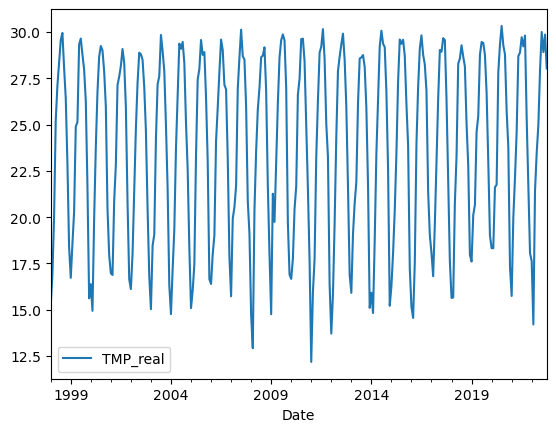

In [6]:
#2
#打开csv文件
Baoan_Weather = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\Baoan_Weather_1998_2022.csv')

#把温度单独拆分为一个新dataframe
Baoan_Tem = Baoan_Weather[['DATE','TMP']]
# Baoan_Tem 

#把TMP拆分为两列
Baoan_Tem[['TMP1','TMP2']] = Baoan_Tem['TMP'].str.split(',', expand=True)

#把TMP1转变成int，并计算出真实的温度
Baoan_Tem['TMP1'] = Baoan_Tem['TMP1'].astype(int)
Baoan_Tem['TMP_real'] = Baoan_Tem['TMP1']/10
Baoan_Tem['TMP1']
# 
#选择出可以使用的数据
Baoan_Tem_real = Baoan_Tem.loc[(Baoan_Tem['TMP1'] < 618)&(Baoan_Tem['TMP1'] > -932)]

#确认数据质量
Baoan_Tem_real['TMP2'].unique()

#选择数据足够好的质量
Baoan_Tem_real_good = Baoan_Tem_real.loc[(Baoan_Tem_real['TMP2']=="1") | (Baoan_Tem_real['TMP2']=="5")]

#把字符串列DATE转化成datetime格式
Baoan_Tem_real_good['Date'] = pd.to_datetime(Baoan_Tem_real_good['DATE'])

#去除多余的列
Baoan_Tem_real_good = Baoan_Tem_real_good.drop(columns=['DATE','TMP',"TMP1",'TMP2'])
#按月分组平均画图
Baoan_Tem_real_good.groupby(pd.Grouper(key='Date', freq='M')).mean().plot()

#没有发现较为明显的趋势

In [7]:
#3
df = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\ibtracs.ALL.list.v04r00.csv',
                 usecols=range(17),
                 # NOTE: 第二行是数据不能跳过 -1
                 skiprows=[1, 2], 
                 parse_dates=['ISO_TIME'],
                 na_values=['NOT_NAMED', 'NAME'])
df.head()

C:\Users\zjm\AppData\Local\Temp\ipykernel_12732\3512933848.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\zjm\Desktop\ESE_5023\ibtracs.ALL.list.v04r00.csv',


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,,,,main,0,0,__________P___
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,,,,main,0,0,__________P___
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,,,,main,0,0,__________P___
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,,,,main,0,0,__________O___
4,1842298N11080,1842,1,NI,AS,NaN,1842-10-25 18:00:00,NR,10.7884,77.9194,,,,main,0,0,__________P___


In [8]:
#3.1
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce')  

grouped = df.groupby('SID')['WMO_WIND'].mean() 

# 获取每个 'SID' 对应的第一个 'NAME'
name_mapping = df.drop_duplicates('SID').set_index('SID')['NAME']

# 将 'grouped' 转换为DataFrame并添加 'NAME' 列 
result = grouped.to_frame(name='Average_Wind').reset_index() 
result['NAME'] = result['SID'].map(name_mapping) 
result.head()
# # grouped.rename(columns={'WMO_WIND': 'AVG_WMO_WIND'}, inplace=True) 
# result = grouped.merge(df[['SID', 'NAME']].drop_duplicates(), on='SID')

# 排序并选择平均风速最大的10个飓风  
top_10_hurricanes = result.sort_values(by='Average_Wind', ascending=False).head(10)
top_10_hurricanes

,SID,Average_Wind,NAME
13012,2016273N13300,101.000000,MATTHEW
13098,2017242N16333,100.454545,IRMA
11706,2003249N14329,99.827586,ISABEL
6311,1959249N19181,98.750000,PATSY
54,1853251N37307,98.333333,NaN
178,1859273N17289,98.000000,NaN
6291,1959214N16219,97.777778,DOT
9087,1980214N11330,97.065217,ALLEN
10816,1995241N11333,93.606557,LUIS
13559,2021266N10327,93.220339,SAM


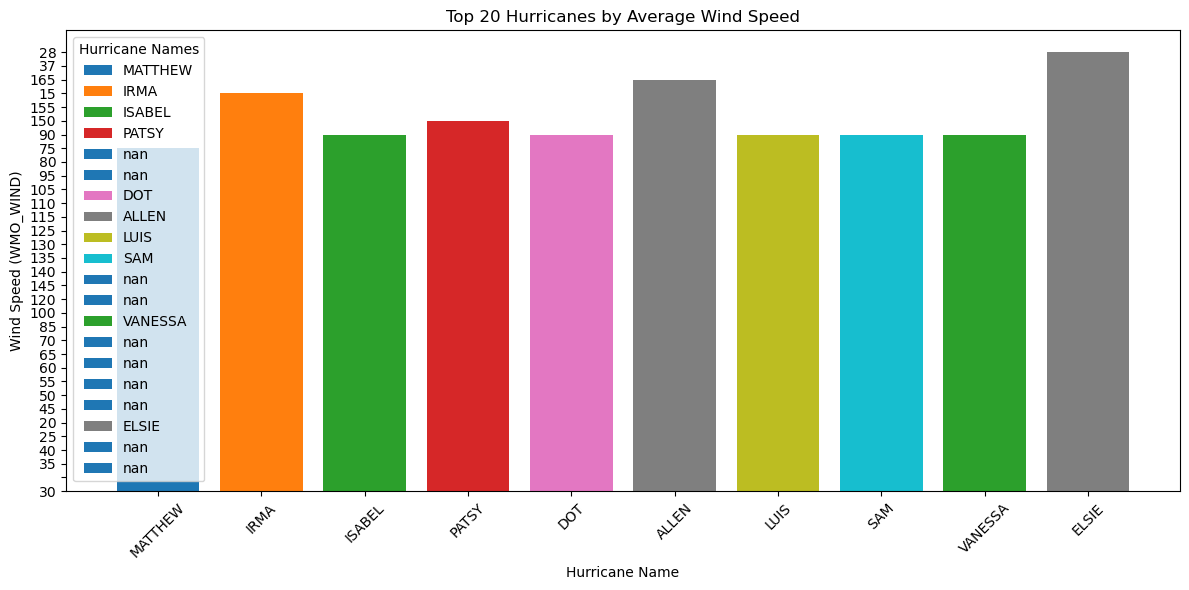

In [172]:
#3.2
top_20_hurricanes = result.sort_values(by='Average_Wind', ascending=False).head(20)
#筛选出最大的20个飓风的名字
top_20_names = top_20_hurricanes['NAME'].tolist() 

#提取出对应行
top_20_df = df[df['NAME'].isin(top_20_names)]

# 绘制柱状图
# NOTE: 这样绘制的柱状图中不会出现NAME值为NAN的元素 -1
plt.figure(figsize=(12, 6)) 
for name in top_20_names: 
    hurricane_data = top_20_df[top_20_df['NAME'] == name] 
    plt.bar(hurricane_data['NAME'], hurricane_data['WMO_WIND'], label=name)

plt.xlabel('Hurricane Name')
plt.ylabel('Wind Speed (WMO_WIND)')
plt.title('Top 20 Hurricanes by Average Wind Speed')
plt.legend(title='Hurricane Names')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# NOTE: 似乎缺少3.3？

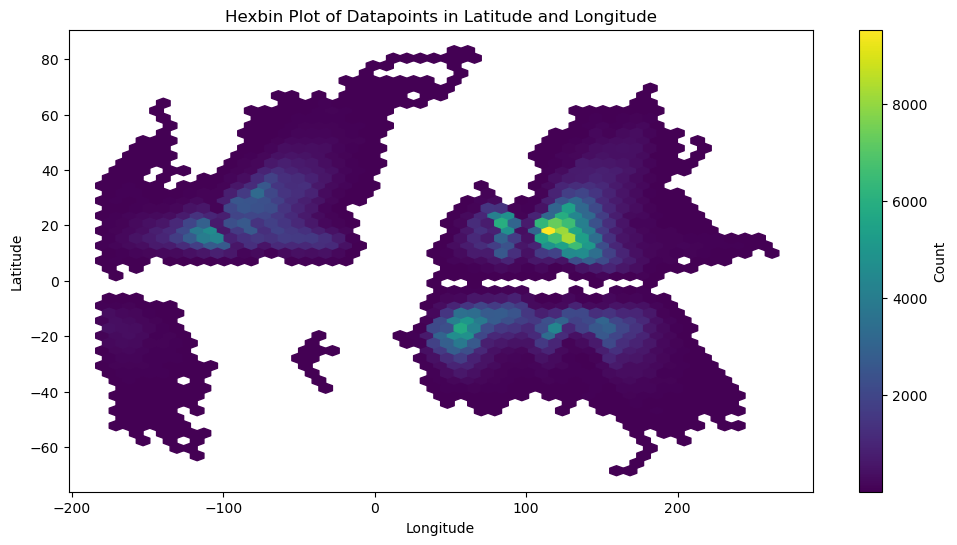

In [9]:
#3.4
# 绘制hexbin图
plt.figure(figsize=(12, 6))
hb = plt.hexbin(df['LON'], df['LAT'], gridsize=50, mincnt=1)
plt.colorbar(hb, label='Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Datapoints in Latitude and Longitude')
plt.show()


C:\Users\zjm\AppData\Local\Temp\ipykernel_12732\1137523712.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(tick_labels)


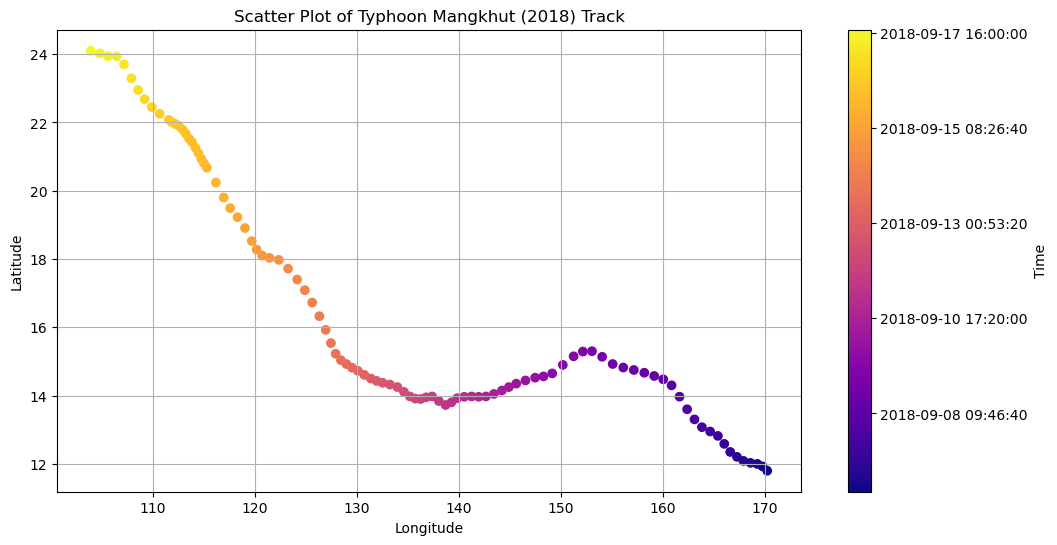

In [10]:
#3.5
# 从ISO_TIME中提取年份 
df['Year'] = df['ISO_TIME'].dt.year

# 筛选出2018年的Mangkhut的数据
df_2018 = df[df['Year'] == 2018]
mangkhut_df = df_2018[df_2018['NAME'] == 'MANGKHUT']

# 绘制散点图
plt.figure(figsize=(12, 6))
sc = plt.scatter(mangkhut_df['LON'], mangkhut_df['LAT'], c=mangkhut_df['ISO_TIME'].astype('int64'), cmap='plasma')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Typhoon Mangkhut (2018) Track')

# 创建时间格式化的图例
cbar = plt.colorbar(sc)
cbar.set_label('Time')
tick_labels = [pd.to_datetime(int(tick)).strftime('%Y-%m-%d %H:%M:%S') for tick in cbar.get_ticks()]
cbar.ax.set_yticklabels(tick_labels)

plt.grid(True)
plt.show()



In [11]:
#3.6
# 筛选自1970年以来的数据，并限定在WP和EP盆地
filtered_df = df[(df['Year'] >= 1970) & (df['BASIN'].isin(['WP', 'EP']))]
filtered_df.head()


,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES,WMO_AGENCY,TRACK_TYPE,DIST2LAND,LANDFALL,IFLAG,Year
350393,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 00:00:00,TS,7.00000,151.400,NaN,1006,tokyo,main,1088,1088,_OO___________,1970
350394,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 03:00:00,TS,7.24752,151.205,NaN,,,main,1109,1109,_PP___________,1970
350395,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 06:00:00,TS,7.50000,151.000,NaN,1002,tokyo,main,1143,1143,_OO___________,1970
350396,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 09:00:00,TS,7.75747,150.772,NaN,,,main,1171,1168,_PP___________,1970
350397,1970050N07151,1970,22,WP,MM,NANCY,1970-02-19 12:00:00,TS,8.00000,150.500,NaN,998,tokyo,main,1182,1179,_OO___________,1970


C:\Users\zjm\AppData\Local\Temp\ipykernel_12732\2344647450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = filtered_df['ISO_TIME'].dt.date


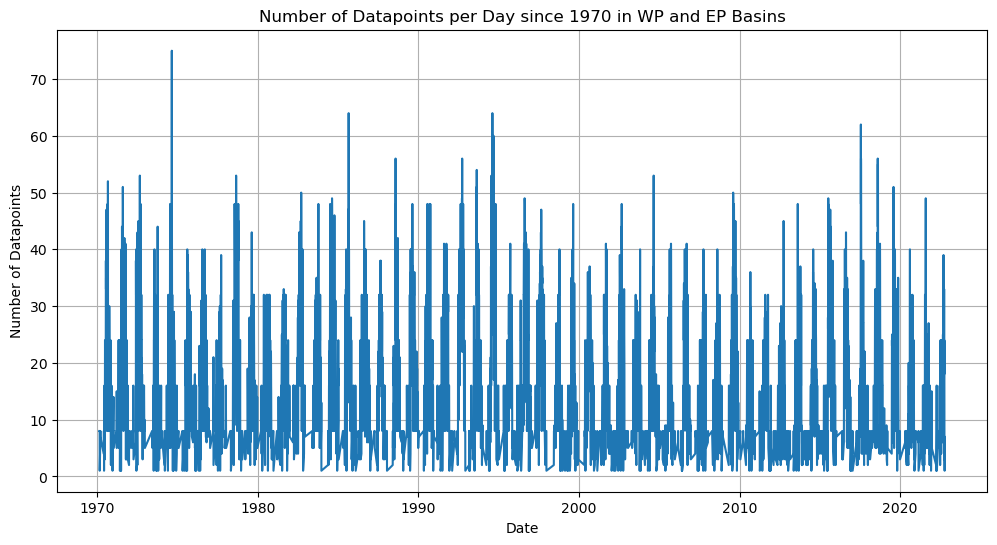

In [12]:
#3.7
# 计算每个日期的数据点数量
filtered_df['Date'] = filtered_df['ISO_TIME'].dt.date
data_points_per_day = filtered_df.groupby('Date').size()

# 绘制时间序列图
plt.figure(figsize=(12, 6))
data_points_per_day.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Number of Datapoints')
plt.title('Number of Datapoints per Day since 1970 in WP and EP Basins')
plt.grid(True)
plt.show()


C:\Users\28910\AppData\Local\Temp\ipykernel_16192\2903360581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DayOfYear'] = filtered_df['ISO_TIME'].dt.dayofyear


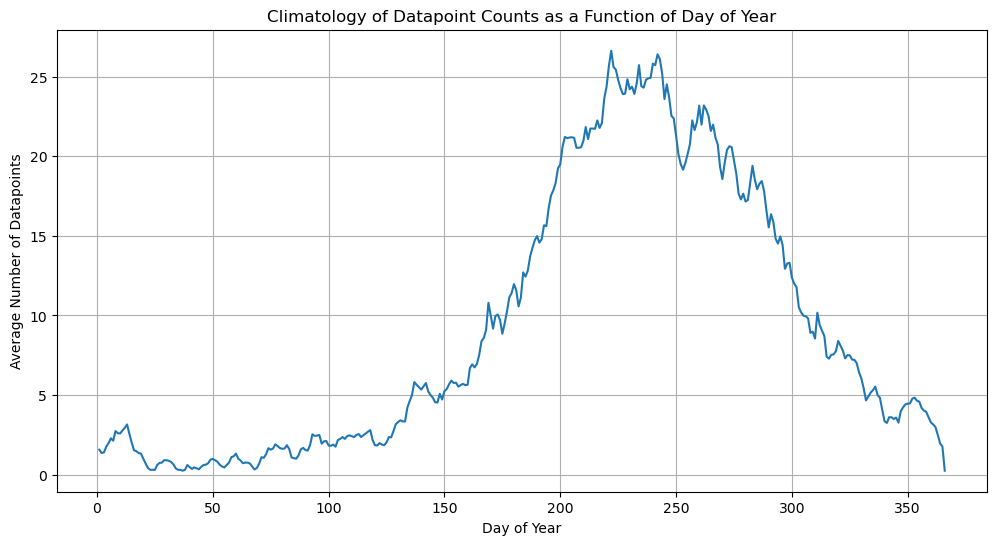

In [163]:
#3.8
# 提取每年的每一天作为顺序天数
filtered_df['DayOfYear'] = filtered_df['ISO_TIME'].dt.dayofyear

# 计算每个顺序天数的数据点数量
data_points_per_dayofyear = filtered_df.groupby('DayOfYear').size()

# 计算climatology，即每个顺序天数的数据点数量的平均值
# NOTE: 不同的DayOfYear不一定出现相同的年数 -1
climatology = data_points_per_dayofyear / (2022 - 1970 + 1) 

climatology.plot(kind='line', figsize=(12, 6))
plt.xlabel('Day of Year')
plt.ylabel('Average Number of Datapoints')
plt.title('Climatology of Datapoint Counts as a Function of Day of Year')
plt.grid(True)
plt.show()


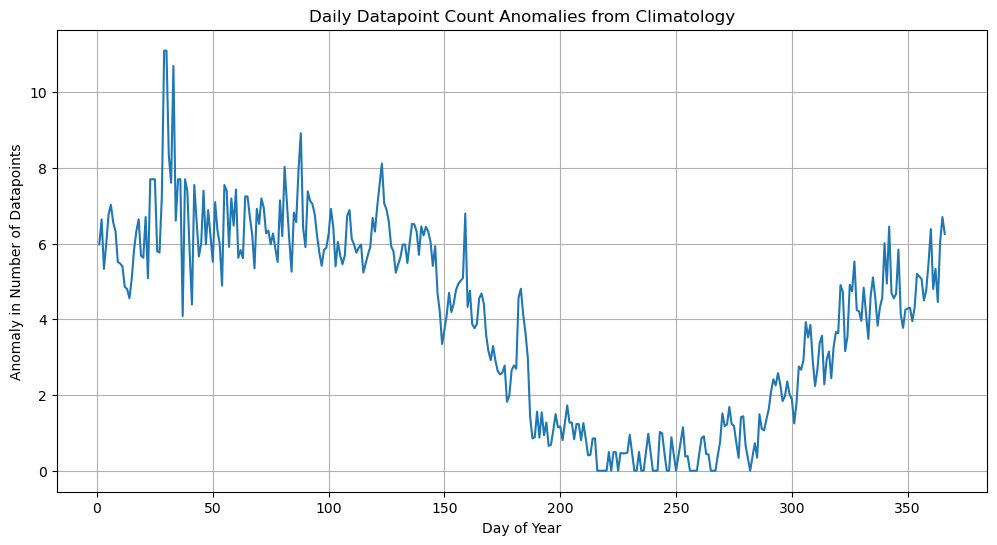

In [ ]:
#3.9
# 计算每日数据点数量的差异（anomaly）
anomaly = data_points_per_day.groupby(data_points_per_day.index.map(lambda x: x.timetuple().tm_yday)).mean() - climatology

# 绘制差异（anomaly）图
plt.figure(figsize=(12, 6))
anomaly.plot(kind='line')
plt.xlabel('Day of Year')
plt.ylabel('Anomaly in Number of Datapoints')
plt.title('Daily Datapoint Count Anomalies from Climatology')
plt.grid(True)
plt.show()


C:\Users\28910\AppData\Local\Temp\ipykernel_16192\3247530574.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_anomaly = anomaly_series.resample('A').size()


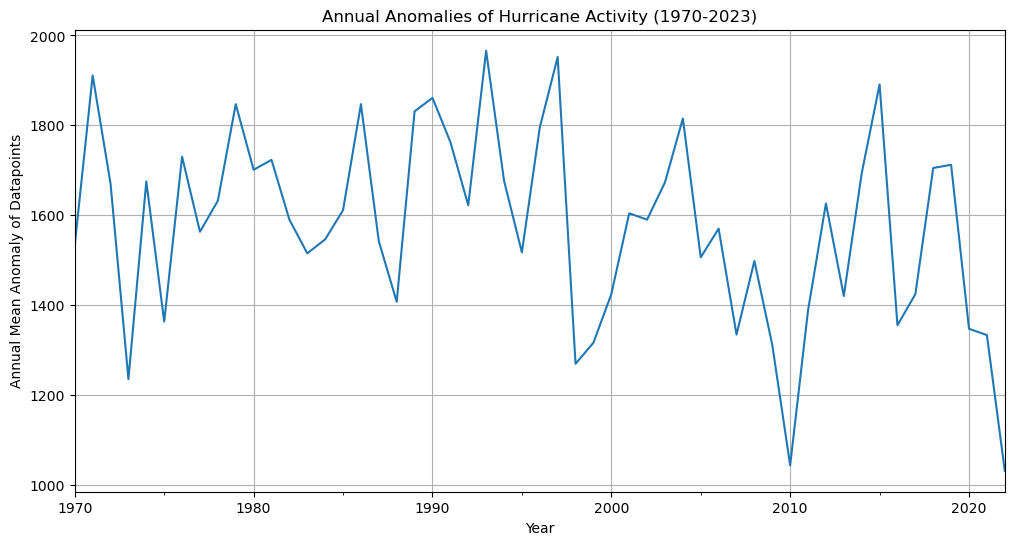

In [175]:
#3.10
anomaly_series = filtered_df.groupby(['ISO_TIME']).size()
annual_anomaly = anomaly_series.resample('A').size()

# 绘制年度异常值图表
plt.figure(figsize=(12, 6))
annual_anomaly.plot()
plt.xlabel('Year')
plt.ylabel('Annual Mean Anomaly of Datapoints')
plt.title('Annual Anomalies of Hurricane Activity (1970-2023)')
plt.grid(True)
plt.show()
# NOTE: 缺少异常年份的分析 -1

In [13]:
#4.1
df = pd.read_csv('USW00013880.csv',
                 usecols=['DATE','TMAX','TMAX_ATTRIBUTES'],
                 parse_dates=['DATE'],
                 na_values=['NOT_NAMED', 'NAME'])
df.head()
df['TMAX_ATTRIBUTES'].unique()

#去除空白值
df_cleaned = df.dropna(subset=['TMAX_ATTRIBUTES'])
df_cleaned['TMAX'] = df_cleaned['TMAX']/10

C:\Users\zjm\AppData\Local\Temp\ipykernel_12732\4117631255.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TMAX'] = df_cleaned['TMAX']/10


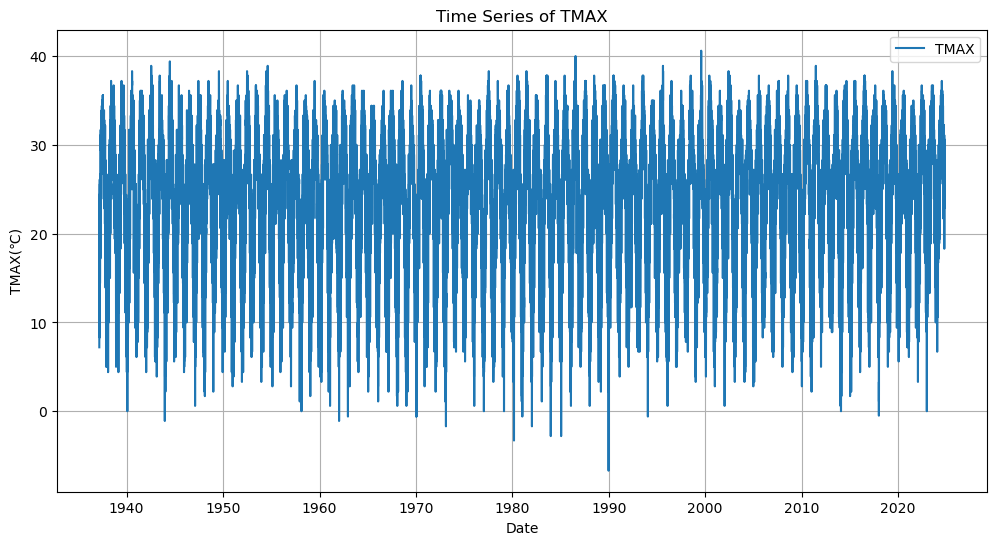

In [14]:
#4.2
# 绘制TMAX的时间序列图表
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned['DATE'], df_cleaned['TMAX'], label='TMAX')
plt.xlabel('Date')
plt.ylabel('TMAX(℃)')
plt.title('Time Series of TMAX')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
#4.3
# 计算统计量
mean_tmax = df_cleaned['TMAX'].mean()
median_tmax = df_cleaned['TMAX'].median()
std_tmax = df_cleaned['TMAX'].std()
min_tmax = df_cleaned['TMAX'].min()
max_tmax = df_cleaned['TMAX'].max()
q1_tmax = df_cleaned['TMAX'].quantile(0.25)
q3_tmax = df_cleaned['TMAX'].quantile(0.75)

print(f"Mean TMAX: {mean_tmax}")
print(f"Median TMAX: {median_tmax}")
print(f"Standard Deviation of TMAX: {std_tmax}")
print(f"Minimum TMAX: {min_tmax}")
print(f"Maximum TMAX: {max_tmax}")
print(f"First Quartile (Q1) of TMAX: {q1_tmax}")
print(f"Third Quartile (Q3) of TMAX: {q3_tmax}")


Mean TMAX: 24.53505808143892
Median TMAX: 26.1
Standard Deviation of TMAX: 7.359642506861778
Minimum TMAX: -6.7
Maximum TMAX: 40.6
First Quartile (Q1) of TMAX: 19.4
Third Quartile (Q3) of TMAX: 30.6
